# Central Difference Method

In [ ]:
from IPython.display import Image

Here differential equation (or eigenvalue equation)
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
is solved numerically by central difference method.

The Taylor series expansion at some point $x=x_i$ is,
$$ y(x_{i}+h) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
Here, this can be written as,
$$ y(x_{i+1}) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
and,
$$ y(x_{i-1}) = y(x_{i})-hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})-\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})-\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$

By subtracting and adding these 2 relations we can get approximated finite difference formulae respectively:
$$ y'(x_i) = \frac{y(x_{i+1}) -y(x_{i-1})}{2h} $$
$$ y''(x_i) = \frac{y(x_{i+1}) +y(x_{i-1}) -2y(x_i)}{h^2} $$

Now, we have the differential equation,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
For a known $\lambda$, we can write $q(\lambda, x)=q(x)$.

Applying the finite difference formulae here,
$$ \frac{y(x_{i+1}) +y(x_{i-1}) -2y(x_i)}{h^2} -p(x_i) \left(\frac{y(x_{i+1}) -y(x_{i-1})}{2h} \right) -q(x_i)y(x_i) -r(x_i) = 0 $$

$$ \implies (y(x_{i+1}) +y(x_{i-1}) -2y(x_i)) - \frac{1}{2} p(x_i) h(y(x_{i+1}) \\
-y(x_{i-1})) -h^2(q(x_i)y(x_i) -r(x_i)) = 0 $$
$$ \implies y(x_{i+1})\left(1 -\frac{h}{2} p(x_i) \right) + y(x_i)\left(-2 -h^2q(x_i) \right) \\
+y(x_{i-1})\left(1 +\frac{h}{2}p(x_i) \right) + \left(h^2r(x_i) \right) = 0 $$

Applying the transformation $i \rightarrow i-1$ we will obtain,
$$ \implies y(x_{i})\left(1 -\frac{h}{2} p(x_{i-1}) \right) + y(x_{i-1})\left(-2 -h^2q(x_{i-1}) \right) \\
+y(x_{i-2})\left(1 +\frac{h}{2}p(x_{i-1}) \right) + \left(h^2r(x_{i-1}) \right) = 0 $$

So,
$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$

## Numerical solution by Central Difference method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Propagator with central difference calculation
Function: **`prop_central_diff(pr, p, q, r, x, y, dx)`**

**Algorithm:**

1. Define $p(x),q(\lambda,x),r(x)$.
2. x array and y array
3. h = dx = x[1] - x[0]
4. N = len(x)
5. Write $a,b,c,d$ and $y_i$ for i in range(N).

$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$

In [2]:
def prop_central_diff(pr, p, q, r, x, y, dx):
    '''
    y'' + py' + qy + r = 0
    p = p(x), q = q(lb, x), r = r(x)
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2, N):
        a = 2 + dx**2 *q(pr, x[i-1])
        b = -(1 + dx/2 *p(x[i-1]))
        c = dx**2 *r(x[i-1])
        d = 1 - dx/2 *p(x[i-1])
        yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
    return yy

### Normalization

In [3]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

### Determination of eigenvalue and eigenfunction
Function: **`center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr)`**

In [4]:
def center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr):
    '''
    x0, y0 - left boundary condition
    xN, yN - right boundary condition
    y1 - estimation of solution at the next point after left boundary (y0)
    '''
    N = int((xN -x0)/dx)
    dx = (xN -x0)/N
    x = [x0 +i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    while abs(pr_max - pr_min) >  tol and itr < max_itr:
        pr = 0.5 *(pr_min + pr_max)  # bisection method
        yy = prop_central_diff(pr, p, q, r, x, y, dx)
        cnt = 0  # count
        for i in range(1, N-2):
            if yy[i]*yy[i+1] < 0:
                cnt += 1
        if cnt > nodes:
            pr_max = pr
        elif cnt < nodes:
            pr_min = pr
        else:
            if yy[N-1] > yN:
                pr_min = pr
            elif yy[N-1] < yN:
                pr_max = pr
            itr += 1
    if itr < max_itr:
        return pr, x, yy
    else:
        return None, None, None

## Schrodinger equation - Central Potential 
The time independent Schrodinger equation in 1D is,
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) $$

For central potential $V=V(r)$, the time independent (1D) Schrodinger will be reduced to,
$$ \frac{d^2\psi}{dr^2} = \frac{2m}{\hbar^2} \, (V(r)-E) \,\psi(r) $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
we can notice,
$$ y(x) = \psi(r) $$
$$ p(x) = 0 $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

Consider the potential,
$$ V(r) = -\frac{e^2}{r} \, \exp(-r/a) $$

C:\Users\suman\AppData\Local\Temp\ipykernel_4432\2848319789.py:18: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:


C:\Users\suman\AppData\Local\Temp\ipykernel_4432\2116218444.py:13: RuntimeWarning: overflow encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
C:\Users\suman\AppData\Local\Temp\ipykernel_4432\2116218444.py:13: RuntimeWarning: invalid value encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d


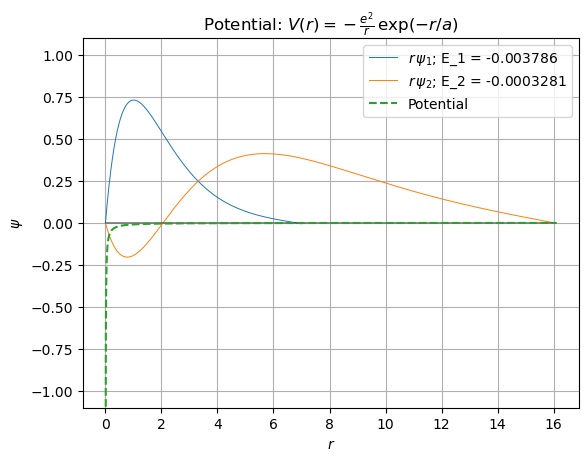

In [5]:
def V(e2, r):
    a = 7.5
    return  -e2/r * np.exp(-r/a)
hcut, m = 0.1, 1
e2 = 0.01
mh2 = 2*m/hcut**2
def p(r):
    return 0
def q(E, r):
    return -mh2 *(E - V(e2, r))
def rfn(r):
    return 0

dr = 0.005
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-4, 0, [7.0,16.1], 0

for nodesn in range(2):
    Emn, Emx = V(e2, r0), V(e2, rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$\psi$')
plt.ylim(-1.1,1.1)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(e2, r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = -\\frac{e^2}{r} \, \exp(-r/a)$')
plt.grid()
plt.show()

## Potential Well

### Infinite Potential well

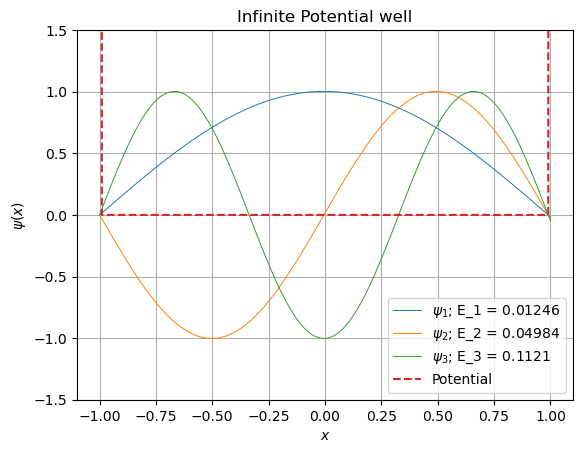

In [6]:
def V(x):
    l0, l1, V0 = -1, 1, 500
    if l0<x and x<l1:
        pot = 0
    else:
        pot = V0
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = -1, 0, 1, 0

for nodesn in range(0,3):
    Emn, Emx = V(0), V(x0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.5)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Infinite Potential well')
plt.grid()
plt.show()

### Finite Potential well

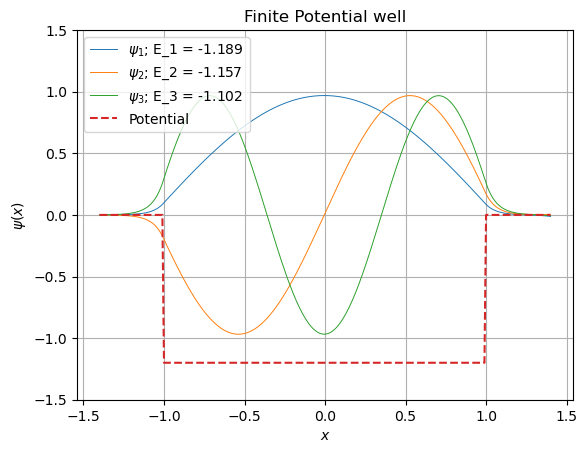

In [7]:
def V(x):
    l0, l1, V0 = -1, 1, -1.2
    if l0<x and x<l1:
        pot = V0
    else:
        pot = 0
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = -1.4, 0, 1.4, 0

for nodesn in range(0,3):
    Emn, Emx = V(0), V(x0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.5)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Finite Potential well')
plt.grid()
plt.show()

### Triangular potential well

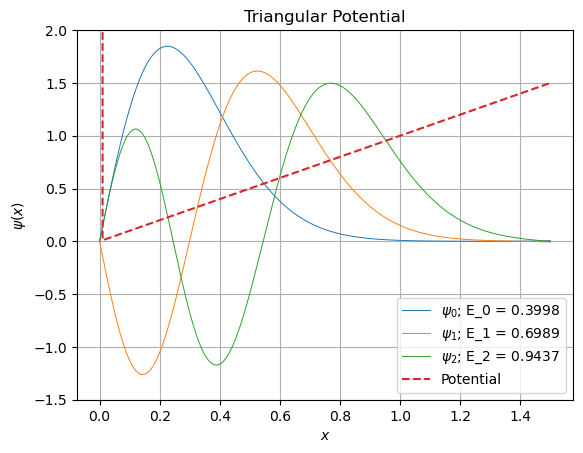

In [8]:
def V(x):
    a, V0 = 1, 2000
    if x <= 0:
        pot = V0
    else:
        pot = a*x
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = 0, 0, 1.5, 0

for nodesn in range(0,3):
    Emn, Emx = -1, V(0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn}$; E_{nodesn} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,2)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Triangular Potential')
plt.grid()
plt.show()

## Radial equation
The radial equation is,
$$ \frac{d^2R}{dr^2} +\frac{2}{r} \frac{dR}{dr} + \frac{2m}{\hbar^2} (E-V(r)) R(r) = 0 $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
we can notice,
$$ y(x) = R(r) $$
$$ p(x) = -\frac{2}{r} $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

### Radial part of Hydrogen atom problem
Here the potential is,
$$ V(r) = -\frac{e^2}{4\pi\epsilon_0 r} $$

C:\Users\suman\AppData\Local\Temp\ipykernel_4432\2848319789.py:18: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:
C:\Users\suman\AppData\Local\Temp\ipykernel_4432\2116218444.py:13: RuntimeWarning: overflow encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
C:\Users\suman\AppData\Local\Temp\ipykernel_4432\2116218444.py:13: RuntimeWarning: invalid value encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d


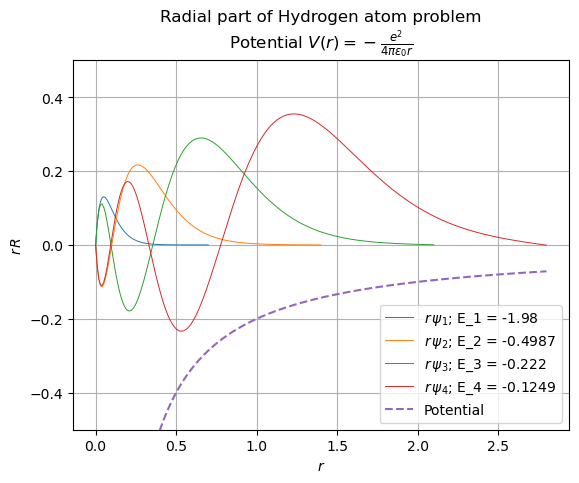

In [9]:
hcut, m, e2 = 0.1, 1, 0.2
mh2 = 2*m/hcut**2

def V(e2, r):
    return -e2/r
def p(r):
    return -2/r
def q(E, r):
    return -mh2 *(E - V(e2, r))
def rfn(r):
    return 0

dr = 1e-2
tol = 1e-6
mxitr = 1000
r0, psi0, rN, psiN = 1e-6, 0, np.arange(1,5)*0.7, 0

for nodesn in range(4):
    Emn, Emx = V(e2, r0), V(e2, rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        rpsi = r*psi
        plt.plot(r, rpsi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$r\,R$')
plt.ylim(-0.5,0.5)
plt.plot(r, V(e2,r), '--', label='Potential')
plt.legend()
plt.title('Radial part of Hydrogen atom problem\n'+
          'Potential $V(r) = -\\frac{e^2}{4\pi\epsilon_0 r}$')
plt.grid()
plt.show()

Now, consider
$$ V(r) = e^{-6r} -e^{-3r} $$

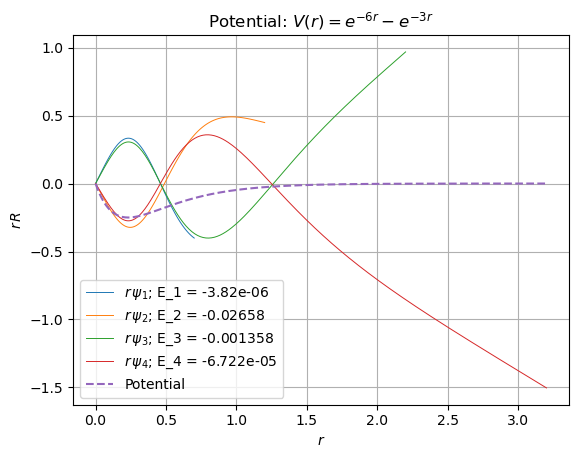

In [10]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2

def V(r):
    return np.exp(-6*r) -np.exp(-3*r)
def p(r):
    return -2/r
def q(E, r):
    return -mh2 *(E - V(r))
def rfn(r):
    return 0

dr = 1e-2
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-6, 0, [0.7,1.2,2.2,3.2], 0

for nodesn in range(4):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        rpsi = r*psi
        plt.plot(r, rpsi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$r\,R$')
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = e^{-6r} -e^{-3r}$')
plt.grid()
plt.show()

Here the eigenvalues are dependent on the choice of boundary (i.e. $r_N$ here) and the eigenfunctions diverges at the boundary.